In [138]:
#EDA
import pandas as pd
import pandas_datareader as pdr
import numpy as np

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Date Time
from datetime import date
from datetime import time
from pandas_profiling import ProfileReport

# SKLEARN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras

In [139]:
key = '6048c14f45df220c823c80330cdcac459048ce57'
df = pdr.get_data_tiingo('GOOGL', api_key = key)

In [140]:
df.to_csv('GOOGL.csv')

In [141]:
stocks = pd.read_csv('GOOGL.csv')

In [142]:
stocks = stocks.reset_index()

In [143]:
stocks.head()

,index,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,GOOGL,2017-01-03 00:00:00+00:00,808.01,811.435,796.89,800.62,1959033,808.01,811.435,796.89,800.62,1959033,0.0,1.0
1,1,GOOGL,2017-01-04 00:00:00+00:00,807.77,813.430,804.11,809.89,1515339,807.77,813.430,804.11,809.89,1515339,0.0,1.0
2,2,GOOGL,2017-01-05 00:00:00+00:00,813.02,813.740,805.92,807.50,1340535,813.02,813.740,805.92,807.50,1340535,0.0,1.0
3,3,GOOGL,2017-01-06 00:00:00+00:00,825.21,828.960,811.50,814.99,2017097,825.21,828.960,811.50,814.99,2017097,0.0,1.0
4,4,GOOGL,2017-01-09 00:00:00+00:00,827.18,830.430,821.62,826.37,1408924,827.18,830.430,821.62,826.37,1408924,0.0,1.0


In [144]:
stocks.shape

(1257, 15)

In [145]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1257 non-null   int64  
 1   symbol       1257 non-null   object 
 2   date         1257 non-null   object 
 3   close        1257 non-null   float64
 4   high         1257 non-null   float64
 5   low          1257 non-null   float64
 6   open         1257 non-null   float64
 7   volume       1257 non-null   int64  
 8   adjClose     1257 non-null   float64
 9   adjHigh      1257 non-null   float64
 10  adjLow       1257 non-null   float64
 11  adjOpen      1257 non-null   float64
 12  adjVolume    1257 non-null   int64  
 13  divCash      1257 non-null   float64
 14  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.4+ KB


## DATA CLEANING

In [146]:
# No null values
stocks.isnull().sum()

index          0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [147]:
stocks.dtypes

index            int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [148]:
## Clean up the date column
stocks.date.value_counts()
# from this we can see that the time values for all dates are the same so it can be dropped as it provides no additional info

2019-07-11 00:00:00+00:00    1
2020-03-16 00:00:00+00:00    1
2021-06-30 00:00:00+00:00    1
2017-01-13 00:00:00+00:00    1
2021-12-15 00:00:00+00:00    1
                            ..
2018-05-18 00:00:00+00:00    1
2021-03-30 00:00:00+00:00    1
2020-01-13 00:00:00+00:00    1
2020-06-09 00:00:00+00:00    1
2017-06-22 00:00:00+00:00    1
Name: date, Length: 1257, dtype: int64

In [149]:
#Strip the date column of the time value
stocks['date'] = stocks['date'].apply(str).str.strip('00:00:00+00:00')
#Convert Date column to datetype dtype
stocks['date'] = pd.to_datetime(stocks['date'])
# Create time column using stripped time value
stocks['time'] = stocks['date'].dt.time
#Re-organize dataframe
stocks = stocks.reindex(columns = ['index','symbol','date','time','close', 'high','low','open','volume',
                                  'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'])

print(stocks.shape)
stocks


(1257, 16)


,index,symbol,date,time,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,GOOGL,2017-01-03,00:00:00,808.01,811.4350,796.8900,800.6200,1959033,808.01,811.4350,796.8900,800.6200,1959033,0.0,1.0
1,1,GOOGL,2017-01-04,00:00:00,807.77,813.4300,804.1100,809.8900,1515339,807.77,813.4300,804.1100,809.8900,1515339,0.0,1.0
2,2,GOOGL,2017-01-05,00:00:00,813.02,813.7400,805.9200,807.5000,1340535,813.02,813.7400,805.9200,807.5000,1340535,0.0,1.0
3,3,GOOGL,2017-01-06,00:00:00,825.21,828.9600,811.5000,814.9900,2017097,825.21,828.9600,811.5000,814.9900,2017097,0.0,1.0
4,4,GOOGL,2017-01-09,00:00:00,827.18,830.4300,821.6200,826.3700,1408924,827.18,830.4300,821.6200,826.3700,1408924,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1252,GOOGL,2021-12-22,00:00:00,2928.30,2930.0000,2861.3500,2861.3500,1316119,2928.30,2930.0000,2861.3500,2861.3500,1316119,0.0,1.0
1253,1253,GOOGL,2021-12-23,00:00:00,2938.33,2964.8700,2929.0400,2930.0000,1319172,2938.33,2964.8700,2929.0400,2930.0000,1319172,0.0,1.0
1254,1254,GOOGL,2021-12-27,00:00:00,2958.13,2966.8799,2943.3850,2945.1200,799223,2958.13,2966.8799,2943.3850,2945.1200,799223,0.0,1.0
1255,1255,GOOGL,2021-12-28,00:00:00,2933.74,2965.9801,2921.0856,2964.7200,912715,2933.74,2965.9801,2921.0856,2964.7200,912715,0.0,1.0


In [150]:
# set stock index as index column
stocks.set_index('index').head(10)

,symbol,date,time,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
index,,,,,,,,,,,,,,,
0,GOOGL,2017-01-03,00:00:00,808.01,811.435,796.8900,800.62,1959033,808.01,811.435,796.8900,800.62,1959033,0.0,1.0
1,GOOGL,2017-01-04,00:00:00,807.77,813.430,804.1100,809.89,1515339,807.77,813.430,804.1100,809.89,1515339,0.0,1.0
2,GOOGL,2017-01-05,00:00:00,813.02,813.740,805.9200,807.50,1340535,813.02,813.740,805.9200,807.50,1340535,0.0,1.0
3,GOOGL,2017-01-06,00:00:00,825.21,828.960,811.5000,814.99,2017097,825.21,828.960,811.5000,814.99,2017097,0.0,1.0
4,GOOGL,2017-01-09,00:00:00,827.18,830.430,821.6200,826.37,1408924,827.18,830.430,821.6200,826.37,1408924,0.0,1.0
5,GOOGL,2017-01-10,00:00:00,826.01,829.410,823.1400,827.07,1197442,826.01,829.410,823.1400,827.07,1197442,0.0,1.0
6,GOOGL,2017-01-11,00:00:00,829.86,829.900,821.4700,826.62,1325394,829.86,829.900,821.4700,826.62,1325394,0.0,1.0
7,GOOGL,2017-01-12,00:00:00,829.53,830.380,821.0100,828.38,1350308,829.53,830.380,821.0100,828.38,1350308,0.0,1.0
8,GOOGL,2017-01-13,00:00:00,830.94,834.650,829.5200,831.00,1290182,830.94,834.650,829.5200,831.00,1290182,0.0,1.0


In [151]:
px.line(stocks, x = 'date', y = 'open', width=600, height=400)


From this we can see that the value of google stocks has gone up considerably in the last 5 years, a boom can be noticed between 2020/2021 which could be due to the pandemic.

## Let us calculate the 7-day rolling mean of the opening price to know the average price within a time period

In [152]:
# Lets first create a stock without adjusted prices, and sort by dates
rollingStock = stocks[['date','open', 'close','high', 'low', 'volume']]
rollingStock.set_index('date')
#rollingStock.rolling(7).mean().head(20)

,open,close,high,low,volume
date,,,,,
2017-01-03,800.6200,808.01,811.4350,796.8900,1959033
2017-01-04,809.8900,807.77,813.4300,804.1100,1515339
2017-01-05,807.5000,813.02,813.7400,805.9200,1340535
2017-01-06,814.9900,825.21,828.9600,811.5000,2017097
2017-01-09,826.3700,827.18,830.4300,821.6200,1408924
...,...,...,...,...,...
2021-12-22,2861.3500,2928.30,2930.0000,2861.3500,1316119
2021-12-23,2930.0000,2938.33,2964.8700,2929.0400,1319172
2021-12-27,2945.1200,2958.13,2966.8799,2943.3850,799223


<AxesSubplot:>

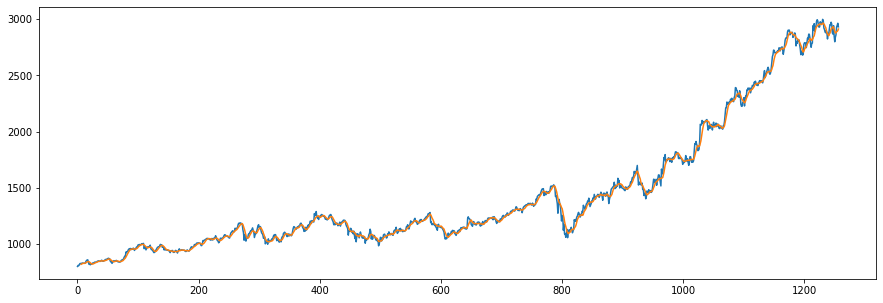

In [153]:
# let us make two line plots of the open stock prices and the rolling stocks prices
stocks['open'].plot(figsize=(15,5))
rollingStock.rolling(7).mean()['close'].plot()

This graph shows the open and averageclosing prices for the stocks are relatively similar, this could possibly show that the stock has been steady in recent years and when it grows or dips it would often hold till when the market closes and reopens 

#### Lets see the close column against the rolling close average column

<AxesSubplot:>

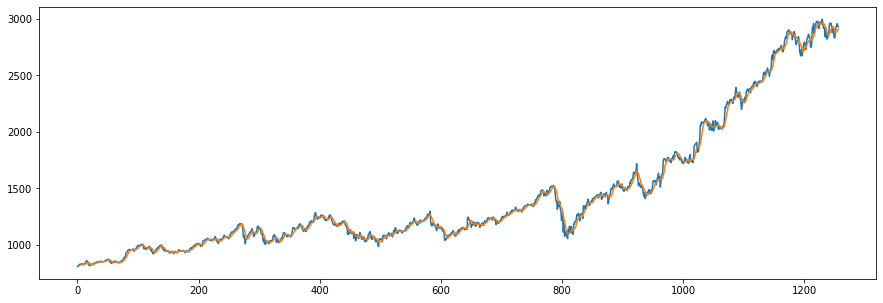

In [154]:
stocks['close'].plot(figsize=(15,5))
rollingStock.rolling(7).mean()['close'].plot()

Similarly our close and average rolling close variables are similar, since the data doesn't move much between open and close values of the stock, showing a steady stock.

### Let us analyze the difference between the close and open prices using the numpy library

In [155]:
stocksOC = stocks[['open','close']]
stocksOC

,open,close
0,800.6200,808.01
1,809.8900,807.77
2,807.5000,813.02
3,814.9900,825.21
4,826.3700,827.18
...,...,...
1252,2861.3500,2928.30
1253,2930.0000,2938.33
1254,2945.1200,2958.13
1255,2964.7200,2933.74


In [156]:
stocksOC['difference'] = stocksOC['open'] - stocksOC['close']
stocksOC

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,open,close,difference
0,800.6200,808.01,-7.3900
1,809.8900,807.77,2.1200
2,807.5000,813.02,-5.5200
3,814.9900,825.21,-10.2200
4,826.3700,827.18,-0.8100
...,...,...,...
1252,2861.3500,2928.30,-66.9500
1253,2930.0000,2938.33,-8.3300
1254,2945.1200,2958.13,-13.0100
1255,2964.7200,2933.74,30.9800


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='difference', ylabel='Density'>

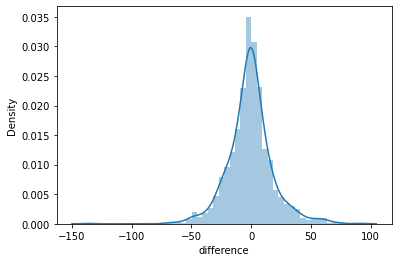

In [157]:
# lets us normalize the difference column before plotting
sns.distplot(stocksOC['difference'])

This plot shows us that the difference between the open and close variables is evenly distributed.

In [158]:
#from sklearn.preprocessing import MinMaxScaler
#mm = MinMaxScaler(feature_range = (0,1))
#d= pd.DataFrame(stocksOC['difference'])
#diff_scaled= mm.fit_transform(d)

 #### Let us now create a training and test set for the machine learning part of our data

In [159]:
trainee = stocks['open']
trainee = pd.DataFrame(trainee)
trainee.shape

(1257, 1)

# Data Preprocessing

In [160]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0,1))
train_scaled = mm.fit_transform(trainee)

In [161]:
# Creating a data structure with 60 timesteps and 1 output

In [162]:
X_train = []
y_train = []
for i in range(60,1257):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [163]:
 train_scaled

array([[0.        ],
       [0.00421577],
       [0.00312885],
       ...,
       [0.97526532],
       [0.98417892],
       [0.96970147]])

# Feature Extraction

In [164]:
# Importing the models for the Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [165]:
# Defining the RNN
regressor = Sequential()

## Neural Network Training

In [166]:
# First LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [167]:
# Adding a second LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences =True))
regressor.add(Dropout(0.2))

In [168]:
# Adding a third LSTM layer and Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [169]:
#OutputLayer
regressor.add(Dense(units=1))

In [170]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

#Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs =100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 82ms/step - loss: 0.0830: 0s - loss: 0.0
Epoch 2/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0717
Epoch 3/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0715
Epoch 4/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0715
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0707
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0702
Epoch 7/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0702
Epoch 8/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0699
Epoch 9/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0701
Epoch 10/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0697
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0702
Epoch 12/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0695
Epoch 13/

38/38 [==============================] - 2s 59ms/step - loss: 0.0687


In [171]:
# Making the predictions and Visualizing Results
# Splitting into train and test sets

from sklearn.model_selection import train_test_split
train, test = train_test_split(rollingStock, test_size=0.2)

In [172]:
test.shape
#train.set_index('date')
test.set_index('date')

,open,close,high,low,volume
date,,,,,
2021-01-07,1726.76,1774.34,1777.820,1726.76,2096829
2018-04-24,1059.20,1022.64,1064.490,1012.86,6411038
2020-04-16,1267.14,1257.43,1273.360,1238.20,2894757
2017-09-26,936.69,937.43,944.080,935.12,1618182
2021-08-31,2902.94,2893.95,2903.425,2885.62,1122438
...,...,...,...,...,...
2020-06-23,1452.00,1463.98,1475.200,1445.00,1887583
2020-07-07,1496.13,1489.92,1521.320,1489.70,2118194
2017-06-20,975.31,968.99,980.790,968.20,1273013


In [173]:
train['volume'] = train.volume.astype(float)
test['volume'] = test.volume.astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 1010 to 571
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    252 non-null    datetime64[ns]
 1   open    252 non-null    float64       
 2   close   252 non-null    float64       
 3   high    252 non-null    float64       
 4   low     252 non-null    float64       
 5   volume  252 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.8 KB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
# testing using the test dataset
testee = test['open']
testee = pd.DataFrame(testee)

In [179]:
testee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 1010 to 571
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [180]:
# Getting predicted stock prices
stock_total = pd.concat((stocks['open'], test['open']),axis = 0)
inputs = stock_total[len(stock_total)- len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = mm.transform(inputs)
inputs.shape

(312, 1)

In [181]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test(X_test.shape[0], X_test.shape[1], 1))
pred_stock = regressor.predict(X_test)

TypeError: 'numpy.ndarray' object is not callable

In [182]:
# Predictions Shape
pred_stock.shape

(20, 60, 1)

In [ ]:
pred_stock = mm.transform(pred_stock)

In [ ]:
predicted_stock = pd.DataFrame(pred_stock)

## Prediction Visualizations

In [ ]:
plt.plot()
plt.plot()